# Module 2 Summative Lab

## Introduction

For today's section, we're going to work on a single big lab to apply everything we've learned in Module 2!

## About This Lab

A quick note before getting started--this lab isn't like other labs you seen so far. This lab is meant to take ~8 hours to complete, so it's much longer and more challenging that the average labs you've seen so far. If you feel like this lab is challenging or that you might be struggling a bit, don't fret--that's by design! With everything we've learned about Web Scraping, APIs, and Databases, the best way to test our knowledge of it is to build something substantial! 

## The Project

In this lab, we're going to make use of everything we've learned about APIs, databases, and Object-Oriented Programming to **_Extract, Transform, and Load_** (or **_ETL_**, for short) some data from a SQL database into a MongoDB Database. 

You'll find a database containing information about soccer teams and the matches they've played in the file `database.sqlite`. For this project, our goal is to get the data we think is important from this SQL database, do some calculations and data transformation, and then store everything in a MongoDB database. 

Let's get into the specifics of this project.

### The Goal

Start by examining the data dictionary for the SQL database we'll be working with, which comes from this [kaggle page](https://www.kaggle.com/laudanum/footballdelphi).  Familiarize yourself with the tables it contains, and what each column means. We'll be using this database to get data on each soccer team, calculate some summary statistics, and then store each in a MongoDB database. 

Upon completion of this lab, each unique team in this dataset should have a record in the MongoDB instance containing the following information:

* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
* The team's win percentage on days where it was raining during games in the 2011 season. 

#### Getting the Weather Data

Note that for this last calculation, you'll need to figure out if it was raining or not during the game. The database itself does not contain this information, but it does contain the date on which the game was played. For this, you'll need to use the [DarkSky API](https://darksky.net/dev) to get the historical weather data for that day. Note that each game is played in a different location, and this information is not contained in our SQL database. However, the teams in this database are largely german, so go ahead and just use the weather in Berlin, Germany as a proxy for this information. If it was raining in Berlin on the day the game was played, count that as rain game--**_you do not need to try and figure out the actual weather at each game's location, because we don't have that information!_**

#### NOTE: The DarkSky API is limited to 1000 free API calls a day, so be sure to test your model on very small samples. Otherwise, you'll hit the rate limit!

## Project Architecture

Unlike previous labs, this lab is more open-ended, and will require you to make design decisions and plan out your strategy for building a system with this many working parts. However, **_using Object-Oriented Programming is a requirement for this project--you must create at least 2 separate, well structured classes in your solution!_** Although it may seem easier to "just start coding", this is a classic beginner's mistake. Instead, think about separating out the different functionalities you'll need to reach your goal, and then build classes to handle each. For instance, at minimum, you'll need to:

* Query the SQL database
* Calculate summary statistics
* Get the weather data from the DarkSky API
* Load the data into MongoDB

We **_strongly recommend_** you consider creating separate classes for handling at least some of these of these tasks.  Be sure to plan the inputs, outputs, and methods for each class before you begin coding! 

**_NOTE:_** We have provided some empty classes below. You are welcome to delete them and use a different architecture for this project if you so choose.  You do not have to use each of them, they are just there to give you an idea of what you could sorts of classes you may want to consider using.

### Rapid Prototyping and Refactoring

It's totally okay to try to get a task working without using OOP. For instance, when experimenting with the DarkSky API for getting historical weather data, it makes sense to just write the code in the cells and rapidly iterate until you get it all working. However, once you get it working, you're not done--you should then **_Refactor_** your code into functions or classes to make your code more modular, reusable, understandable, and maintainable! 

In short--do what you need to do to get each separate piece of functionality working, and then refactor it into a class after you've figured it out!

### Some Final Advice

You haven't built anything this big or complex thus far, so you may not yet fully realize how much trial and error goes into it. If your code keeps breaking, resist the urge to get frustrated, and just keep working. Software development is an iterative process!  No one writes perfect code that works the first time for something this involved. You're going to run into _a lot_ of small errors in this project, right up until the point where it just works, and then you're done! However, you can reduce these errors by planning out your code, and thinking about how all of the pieces fit together before you begin coding. Once you have some basic understanding of how it all will work, then you'll know what you need to build, and then all that is left is to build it!

In short:

* Plan ahead--you'll thank yourself later!
* Errors and broken code aren't bad, they're normal. 
* Keep working, and stay confident--you can do this!

Good luck--we look forward to seeing your completed project!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# We've scaffolded your classes in the provided lib.py file
from lib import MongoHandler, WeatherGetter
import pandas as pd

In [3]:
getter = WeatherGetter()

In [4]:
import sqlite3

conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [5]:
cur.execute('''
SELECT name FROM sqlite_master
WHERE type = 'table' AND name NOT LIKE 'sqlite_%'
;''').fetchall()

[('Matches',), ('Teams_in_Matches',), ('Teams',), ('Unique_Teams',)]

In [6]:
cur.execute('''
PRAGMA table_info(Matches)
;''').fetchall()

[(0, 'Match_ID', 'INTEGER', 1, None, 1),
 (1, 'Div', 'TEXT', 0, None, 0),
 (2, 'Season', 'INT', 0, None, 0),
 (3, 'Date', 'TEXT', 0, None, 0),
 (4, 'HomeTeam', 'TEXT', 0, None, 0),
 (5, 'AwayTeam', 'TEXT', 0, None, 0),
 (6, 'FTHG', 'INT', 0, None, 0),
 (7, 'FTAG', 'INT', 0, None, 0),
 (8, 'FTR', 'TEXT', 0, None, 0)]

In [7]:
cur.execute('''
SELECT * FROM Matches
WHERE (Div = 'D1' OR Div = 'D2')
AND Season = 2011
;''')                 #Select all german games(since we are only looking at weather in Berlin)

german_matches_2011 = pd.DataFrame(cur.fetchall())
german_matches_2011.columns = [x[0] for x in cur.description]
german_matches_2011.head()


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [8]:
german_matches_2011.describe()

,Match_ID,Season,FTHG,FTAG
count,612.000000,612.0,612.000000,612.000000
mean,1397.500000,2011.0,1.627451,1.199346
std,176.813461,0.0,1.355753,1.201254
min,1092.000000,2011.0,0.000000,0.000000
25%,1244.750000,2011.0,1.000000,0.000000
50%,1397.500000,2011.0,1.000000,1.000000
75%,1550.250000,2011.0,2.000000,2.000000
max,1703.000000,2011.0,7.000000,6.000000


In [9]:
german_matches_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
Match_ID    612 non-null int64
Div         612 non-null object
Season      612 non-null int64
Date        612 non-null object
HomeTeam    612 non-null object
AwayTeam    612 non-null object
FTHG        612 non-null int64
FTAG        612 non-null int64
FTR         612 non-null object
dtypes: int64(4), object(5)
memory usage: 43.2+ KB


In [10]:
for col in german_matches_2011:
    display(german_matches_2011[col].unique())

array([1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124,
       1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135,
       1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146,
       1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157,
       1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168,
       1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179,
       1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190,
       1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201,
       1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212,
       1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223,
       1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234,
       1235, 1236, 1237, 1238, 1239, 1240, 1241, 12

array(['D1', 'D2'], dtype=object)

array([2011])

array(['2012-03-31', '2011-12-11', '2011-08-13', '2011-11-27',
       '2012-02-18', '2012-01-20', '2012-02-04', '2012-04-21',
       '2011-09-18', '2011-10-23', '2011-10-01', '2012-03-03',
       '2011-08-27', '2012-03-17', '2011-11-06', '2012-05-05',
       '2012-04-11', '2011-12-17', '2012-02-03', '2011-10-29',
       '2012-01-22', '2011-12-03', '2012-04-14', '2012-03-25',
       '2012-03-10', '2012-04-07', '2011-11-19', '2011-10-14',
       '2011-09-24', '2012-04-28', '2011-12-18', '2012-03-02',
       '2012-03-16', '2012-02-17', '2011-08-06', '2011-11-04',
       '2011-09-16', '2011-07-15', '2012-05-06', '2012-02-11',
       '2011-10-02', '2012-03-30', '2011-10-22', '2011-08-26',
       '2011-08-07', '2012-02-24', '2011-07-17', '2012-02-12',
       '2011-08-22', '2011-09-09', '2012-04-01', '2011-09-25',
       '2012-04-20', '2011-11-25', '2012-03-09', '2011-11-07',
       '2011-09-10', '2011-08-21', '2011-09-26', '2012-03-26',
       '2011-10-30', '2012-02-13', '2012-02-26', '2011-

array(['Nurnberg', 'Stuttgart', 'Wolfsburg', 'Mainz', 'Freiburg',
       "M'gladbach", 'Hamburg', 'Werder Bremen', 'Schalke 04', 'Hannover',
       'Hoffenheim', 'Leverkusen', 'Kaiserslautern', 'Hertha', 'Augsburg',
       'FC Koln', 'Dortmund', 'Bayern Munich', 'Hansa Rostock', 'Bochum',
       'Ein Frankfurt', 'Paderborn', 'Greuther Furth',
       'Fortuna Dusseldorf', 'Ingolstadt', 'Cottbus', 'St Pauli',
       'Frankfurt FSV', 'Union Berlin', 'Munich 1860', 'Aachen',
       'Karlsruhe', 'Braunschweig', 'Erzgebirge Aue', 'Duisburg',
       'Dresden'], dtype=object)

array(['Bayern Munich', 'Dortmund', 'Dresden', 'Duisburg',
       'Ein Frankfurt', 'FC Koln', 'Freiburg', 'Hamburg',
       'Kaiserslautern', 'Karlsruhe', 'Leverkusen', 'Nurnberg',
       'Schalke 04', 'Stuttgart', 'Werder Bremen', 'Bochum', 'Hannover',
       'Hansa Rostock', 'Hertha', 'Mainz', 'Munich 1860', 'St Pauli',
       'Wolfsburg', "M'gladbach", 'Cottbus', 'Greuther Furth', 'Aachen',
       'Union Berlin', 'Braunschweig', 'Erzgebirge Aue', 'Paderborn',
       'Augsburg', 'Hoffenheim', 'Frankfurt FSV', 'Ingolstadt',
       'Fortuna Dusseldorf'], dtype=object)

array([0, 1, 3, 2, 4, 5, 7, 6])

array([1, 2, 0, 3, 6, 4, 5])

array(['A', 'H', 'D'], dtype=object)

The dataframe I have created is clean without any null values.

In [11]:
# Using this to count the goals 
# scored when team played at home

german_teams_home_goals = german_matches_2011.groupby(['HomeTeam']).sum()
german_teams_home_goals.head()

,Match_ID,Season,FTHG,FTAG
HomeTeam,,,,
Aachen,24768,34187,15,24
Augsburg,22397,34187,20,19
Bayern Munich,22898,34187,49,6
Bochum,24898,34187,23,23
Braunschweig,24745,34187,21,15


In [12]:
# select just the FTHG column
german_teams_home_goals = german_teams_home_goals['FTHG']
german_teams_home_goals

HomeTeam
Aachen                15
Augsburg              20
Bayern Munich         49
Bochum                23
Braunschweig          21
Cottbus               18
Dortmund              44
Dresden               30
Duisburg              23
Ein Frankfurt         38
Erzgebirge Aue        19
FC Koln               20
Fortuna Dusseldorf    35
Frankfurt FSV         20
Freiburg              24
Greuther Furth        46
Hamburg               19
Hannover              31
Hansa Rostock         20
Hertha                19
Hoffenheim            21
Ingolstadt            28
Kaiserslautern        12
Karlsruhe             23
Leverkusen            28
M'gladbach            29
Mainz                 27
Munich 1860           35
Nurnberg              22
Paderborn             28
Schalke 04            47
St Pauli              36
Stuttgart             36
Union Berlin          30
Werder Bremen         31
Wolfsburg             29
Name: FTHG, dtype: int64

In [13]:
# Create a similar table to see how many goals were
# scored by each team when playing away

german_teams_away_goals = german_matches_2011.groupby(['AwayTeam']).sum()['FTAG']
german_teams_away_goals

AwayTeam
Aachen                15
Augsburg              16
Bayern Munich         28
Bochum                18
Braunschweig          16
Cottbus               12
Dortmund              36
Dresden               20
Duisburg              19
Ein Frankfurt         38
Erzgebirge Aue        12
FC Koln               19
Fortuna Dusseldorf    29
Frankfurt FSV         23
Freiburg              21
Greuther Furth        27
Hamburg               16
Hannover              10
Hansa Rostock         14
Hertha                19
Hoffenheim            20
Ingolstadt            15
Kaiserslautern        12
Karlsruhe             11
Leverkusen            24
M'gladbach            20
Mainz                 20
Munich 1860           27
Nurnberg              16
Paderborn             23
Schalke 04            27
St Pauli              23
Stuttgart             27
Union Berlin          25
Werder Bremen         18
Wolfsburg             18
Name: FTAG, dtype: int64

In [14]:
german_teams_df = pd.concat([german_teams_home_goals, german_teams_away_goals], axis = 1)
german_teams_df.head()

,FTHG,FTAG
Aachen,15,15
Augsburg,20,16
Bayern Munich,49,28
Bochum,23,18
Braunschweig,21,16


In [15]:
german_teams_df['Total goals'] = (german_teams_df['FTHG']
                                    + german_teams_df['FTAG'])
german_teams_df.head()

,FTHG,FTAG,Total goals
Aachen,15,15,30
Augsburg,20,16,36
Bayern Munich,49,28,77
Bochum,23,18,41
Braunschweig,21,16,37


In [16]:
# Use a similar process to add the number of matches played
num_home_games = german_matches_2011.groupby(['HomeTeam']).count()['Match_ID']
num_away_games = german_matches_2011.groupby(['AwayTeam']).count()['Match_ID']
german_teams_df['Matches Played'] = num_home_games + num_away_games
german_teams_df.head()

,FTHG,FTAG,Total goals,Matches Played
Aachen,15,15,30,34
Augsburg,20,16,36,34
Bayern Munich,49,28,77,34
Bochum,23,18,41,34
Braunschweig,21,16,37,34


In [17]:
# Want to add number of wins for each team
home_wins = german_matches_2011[german_matches_2011['FTR'] == 'H'].groupby(['HomeTeam']).count()['FTR']
away_wins = german_matches_2011[german_matches_2011['FTR'] == 'A'].groupby(['AwayTeam']).count()['FTR']
german_teams_df['Num wins'] = home_wins + away_wins
german_teams_df.head()

,FTHG,FTAG,Total goals,Matches Played,Num wins
Aachen,15,15,30,34,6
Augsburg,20,16,36,34,8
Bayern Munich,49,28,77,34,23
Bochum,23,18,41,34,10
Braunschweig,21,16,37,34,10


In [18]:
# Same for losses
home_losses = pd.DataFrame(german_matches_2011[german_matches_2011['FTR'] == 'A'].groupby(['HomeTeam']).count()['FTR'])
away_losses = pd.DataFrame(german_matches_2011[german_matches_2011['FTR'] == 'H'].groupby(['AwayTeam']).count()['FTR'])
total_losses = home_losses.join(away_losses, how='outer', lsuffix = 'h', rsuffix = 'a').fillna(0)
german_teams_df['Num losses'] = total_losses['FTRh'] + total_losses['FTRa']
german_teams_df.head()

,FTHG,FTAG,Total goals,Matches Played,Num wins,Num losses
Aachen,15,15,30,34,6,15.0
Augsburg,20,16,36,34,8,12.0
Bayern Munich,49,28,77,34,23,7.0
Bochum,23,18,41,34,10,17.0
Braunschweig,21,16,37,34,10,9.0


In [19]:
german_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Aachen to Wolfsburg
Data columns (total 6 columns):
FTHG              36 non-null int64
FTAG              36 non-null int64
Total goals       36 non-null int64
Matches Played    36 non-null int64
Num wins          36 non-null int64
Num losses        36 non-null float64
dtypes: float64(1), int64(5)
memory usage: 2.0+ KB


At this point I want to add the weather data, count how may matches were played in the rain and subsequently, how many rainy games played were won by each team.

In [20]:
# test the weather getter class
# berlin coordinates from google
berlin_lat = '52.5200'
berlin_lon = '13.4050'
getter = WeatherGetter()
data = getter.get_weather(berlin_lat, berlin_lon, '2012-03-31') # using the first date given in the german_matches_2011 df

In [21]:
data.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'offset'])

In [22]:
data['currently']

{'time': 1333198800,
 'summary': 'Mostly Cloudy',
 'icon': 'partly-cloudy-day',
 'precipIntensity': 0,
 'precipProbability': 0,
 'temperature': 5.17,
 'apparentTemperature': 1.25,
 'dewPoint': 1.29,
 'humidity': 0.76,
 'windSpeed': 5.66,
 'windGust': 11.31,
 'windBearing': 311,
 'cloudCover': 0.75,
 'uvIndex': 3,
 'visibility': 10.003}

In [23]:
data['currently']['precipIntensity']

0

In [24]:
# checking the format of the dates in the df
for date in german_matches_2011['Date'].iloc[:5]:
    print (date)

2012-03-31
2011-12-11
2011-08-13
2011-11-27
2012-02-18


In [25]:
dates = []
for date in german_matches_2011['Date'].unique():
    dates.append(date)
dates

['2012-03-31',
 '2011-12-11',
 '2011-08-13',
 '2011-11-27',
 '2012-02-18',
 '2012-01-20',
 '2012-02-04',
 '2012-04-21',
 '2011-09-18',
 '2011-10-23',
 '2011-10-01',
 '2012-03-03',
 '2011-08-27',
 '2012-03-17',
 '2011-11-06',
 '2012-05-05',
 '2012-04-11',
 '2011-12-17',
 '2012-02-03',
 '2011-10-29',
 '2012-01-22',
 '2011-12-03',
 '2012-04-14',
 '2012-03-25',
 '2012-03-10',
 '2012-04-07',
 '2011-11-19',
 '2011-10-14',
 '2011-09-24',
 '2012-04-28',
 '2011-12-18',
 '2012-03-02',
 '2012-03-16',
 '2012-02-17',
 '2011-08-06',
 '2011-11-04',
 '2011-09-16',
 '2011-07-15',
 '2012-05-06',
 '2012-02-11',
 '2011-10-02',
 '2012-03-30',
 '2011-10-22',
 '2011-08-26',
 '2011-08-07',
 '2012-02-24',
 '2011-07-17',
 '2012-02-12',
 '2011-08-22',
 '2011-09-09',
 '2012-04-01',
 '2011-09-25',
 '2012-04-20',
 '2011-11-25',
 '2012-03-09',
 '2011-11-07',
 '2011-09-10',
 '2011-08-21',
 '2011-09-26',
 '2012-03-26',
 '2011-10-30',
 '2012-02-13',
 '2012-02-26',
 '2011-12-19',
 '2012-03-11',
 '2011-11-26',
 '2012-04-

In [26]:
len(dates)

136

I can retrieve the weather data for 136 unique matchdays and update the matches dataframe using the returned dictionary.

I have examined the data that I will receive from the DarkSky API. My weather getter class now has methods that will create a weather data dictionary. I will feed it the dates from my matches df to obtain all the data I need. I will examine all the data to make sure it is clean. After that, I will update my dataframe with rain data.

In [27]:
weather_dict = getter.get_weather_dates(berlin_lat, berlin_lon, dates)
weather_dict

{'2012-03-31': {'time': 1333198800,
  'summary': 'Mostly Cloudy',
  'icon': 'partly-cloudy-day',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 5.17,
  'apparentTemperature': 1.25,
  'dewPoint': 1.29,
  'humidity': 0.76,
  'windSpeed': 5.66,
  'windGust': 11.31,
  'windBearing': 311,
  'cloudCover': 0.75,
  'uvIndex': 3,
  'visibility': 10.003},
 '2011-12-11': {'time': 1323612000,
  'summary': 'Mostly Cloudy',
  'icon': 'partly-cloudy-day',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 3.69,
  'apparentTemperature': 0.52,
  'dewPoint': -1.45,
  'humidity': 0.69,
  'windSpeed': 3.57,
  'windGust': 3.57,
  'windBearing': 191,
  'cloudCover': 0.75,
  'uvIndex': 0,
  'visibility': 9.996},
 '2011-08-13': {'time': 1313240400,
  'summary': 'Partly Cloudy',
  'icon': 'partly-cloudy-day',
  'precipIntensity': 0,
  'precipProbability': 0,
  'temperature': 22.19,
  'apparentTemperature': 22.19,
  'dewPoint': 12.36,
  'humidity': 0.54,
  'windSpeed': 4.12,


In [28]:
# create a dataframe of weather data to explore the columns
weather_df = pd.DataFrame(weather_dict).transpose()
weather_df.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType
2012-03-31,1333198800,Mostly Cloudy,partly-cloudy-day,0,0,5.17,1.25,1.29,0.76,5.66,11.31,311,0.75,3,10.003,NaN
2011-12-11,1323612000,Mostly Cloudy,partly-cloudy-day,0,0,3.69,0.52,-1.45,0.69,3.57,3.57,191,0.75,0,9.996,NaN
2011-08-13,1313240400,Partly Cloudy,partly-cloudy-day,0,0,22.19,22.19,12.36,0.54,4.12,4.47,270,0.44,5,10.003,NaN
2011-11-27,1322402400,Mostly Cloudy,partly-cloudy-day,0,0,10.01,10.01,4.01,0.66,10.28,10.28,250,0.75,0,10.003,NaN
2012-02-18,1329573600,Mostly Cloudy,partly-cloudy-day,0,0,8.01,5.79,3.83,0.75,3.57,3.57,180,0.75,1,10.003,NaN


In [29]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 2012-03-31 to 2011-08-15
Data columns (total 16 columns):
time                   136 non-null object
summary                136 non-null object
icon                   101 non-null object
precipIntensity        135 non-null object
precipProbability      135 non-null object
temperature            136 non-null object
apparentTemperature    136 non-null object
dewPoint               136 non-null object
humidity               136 non-null object
windSpeed              136 non-null object
windGust               123 non-null object
windBearing            136 non-null object
cloudCover             100 non-null object
uvIndex                100 non-null object
visibility             136 non-null object
precipType             8 non-null object
dtypes: object(16)
memory usage: 18.1+ KB


In [30]:
# explore the row with null precip intensity
weather_df[weather_df['precipIntensity'].isnull()]

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType
2011-11-26,1322316000,Mostly Cloudy,partly-cloudy-day,NaN,NaN,7.99,4.37,4.01,0.76,6.97,NaN,236,0.75,0,10.003,NaN


It doesn't looked like it rained on that day so I can set the intensity to 0. (I won't be using the probability column)

In [31]:
weather_df['precipIntensity'].fillna(0, inplace = True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 2012-03-31 to 2011-08-15
Data columns (total 16 columns):
time                   136 non-null object
summary                136 non-null object
icon                   101 non-null object
precipIntensity        136 non-null float64
precipProbability      135 non-null object
temperature            136 non-null object
apparentTemperature    136 non-null object
dewPoint               136 non-null object
humidity               136 non-null object
windSpeed              136 non-null object
windGust               123 non-null object
windBearing            136 non-null object
cloudCover             100 non-null object
uvIndex                100 non-null object
visibility             136 non-null object
precipType             8 non-null object
dtypes: float64(1), object(15)
memory usage: 18.1+ KB


Precipitation type has too many nulls. I won't use this to determine the weather. The columns i want to use are summary and precipitaion intensity.

In [32]:
weather_df = weather_df[['summary', 'precipIntensity']]

weather_df.head()

,summary,precipIntensity
2012-03-31,Mostly Cloudy,0.0
2011-12-11,Mostly Cloudy,0.0
2011-08-13,Partly Cloudy,0.0
2011-11-27,Mostly Cloudy,0.0
2012-02-18,Mostly Cloudy,0.0


In [33]:
# update match df with weather info
matches_with_weather = german_matches_2011.join(weather_df, on = 'Date', how = 'left')
matches_with_weather.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,summary,precipIntensity
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Mostly Cloudy,0.0
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,Mostly Cloudy,0.0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,Partly Cloudy,0.0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,Mostly Cloudy,0.0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,Mostly Cloudy,0.0


Add a column with 1's if it was raining during the match (precipIntensity > 0) or 0 if it wasn't raining (precipIntensity = 0)

In [34]:
# matches_with_weather['raining'] = 
matches_with_weather['raining'] = (
    matches_with_weather['precipIntensity'].map(lambda x: 1 if x>0 else 0)
                                    )

In [35]:
rainy_df = matches_with_weather[matches_with_weather['raining'] == 1]
rainy_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,summary,precipIntensity,raining
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,Possible Drizzle,0.0463,1
24,1116,D1,2011,2011-12-03,M'gladbach,Dortmund,1,1,D,Possible Light Rain,0.7672,1
34,1126,D2,2011,2011-12-18,Hansa Rostock,Dresden,2,2,D,Possible Drizzle,0.0986,1
53,1145,D2,2011,2011-12-18,Cottbus,Duisburg,1,1,D,Possible Drizzle,0.0986,1
59,1151,D2,2011,2011-10-23,Ein Frankfurt,Duisburg,3,0,H,Possible Drizzle,0.0463,1
85,1177,D1,2011,2011-12-03,Stuttgart,FC Koln,2,2,D,Possible Light Rain,0.7672,1
86,1178,D1,2011,2011-12-16,Bayern Munich,FC Koln,3,0,H,Possible Light Rain,1.6265,1
158,1250,D2,2011,2011-12-03,Ein Frankfurt,Karlsruhe,2,0,H,Possible Light Rain,0.7672,1
213,1305,D1,2011,2011-10-23,Leverkusen,Schalke 04,0,1,A,Possible Drizzle,0.0463,1
243,1335,D1,2011,2011-12-03,Bayern Munich,Werder Bremen,4,1,H,Possible Light Rain,0.7672,1


In [37]:
# Repeat above steps to calculate wins and games in rain (should've created a function ...)
home_wins_in_rain = pd.DataFrame(rainy_df[rainy_df['FTR'] == 'H'].groupby('HomeTeam').count()['FTR'])
away_wins_in_rain = pd.DataFrame(rainy_df[rainy_df['FTR'] == 'A'].groupby('AwayTeam').count()['FTR'])

# join home and away dfs and fill NAs
wins_in_rain = home_wins_in_rain.join(away_wins_in_rain, how = 'outer', lsuffix = 'h', rsuffix = 'a').fillna(0)

# total wins column
wins_in_rain['total_wins'] = wins_in_rain['FTRh'] + wins_in_rain['FTRa']
wins_in_rain

,FTRh,FTRa,total_wins
Aachen,1.0,0.0,1.0
Bayern Munich,2.0,0.0,2.0
Bochum,1.0,0.0,1.0
Braunschweig,0.0,1.0,1.0
Cottbus,0.0,1.0,1.0
Ein Frankfurt,2.0,0.0,2.0
Greuther Furth,2.0,0.0,2.0
Hannover,1.0,0.0,1.0
Leverkusen,1.0,0.0,1.0
M'gladbach,1.0,0.0,1.0


In [38]:
# similarly for num of games in rain
home_games_in_rain = rainy_df.groupby('HomeTeam').count()[['Match_ID']]
away_games_in_rain = rainy_df.groupby('AwayTeam').count()[['Match_ID']]
games_in_rain = home_games_in_rain.join(away_games_in_rain, how='outer', lsuffix = 'h', rsuffix = 'a').fillna(0)

games_in_rain['total_games'] = games_in_rain['Match_IDh'] + games_in_rain['Match_IDa']
games_in_rain

,Match_IDh,Match_IDa,total_games
Aachen,1.0,1.0,2.0
Bayern Munich,2.0,1.0,3.0
Bochum,1.0,1.0,2.0
Braunschweig,1.0,1.0,2.0
Cottbus,1.0,2.0,3.0
Dortmund,0.0,1.0,1.0
Dresden,0.0,1.0,1.0
Duisburg,1.0,2.0,3.0
Ein Frankfurt,2.0,0.0,2.0
Erzgebirge Aue,2.0,1.0,3.0


In [39]:
german_teams_df = german_teams_df.join(games_in_rain['total_games'], how = 'left').fillna(0)
german_teams_df = german_teams_df.join(wins_in_rain['total_wins'], how = 'left').fillna(0)

german_teams_df

,FTHG,FTAG,Total goals,Matches Played,Num wins,Num losses,total_games,total_wins
Aachen,15,15,30,34,6,15.0,2.0,1.0
Augsburg,20,16,36,34,8,12.0,0.0,0.0
Bayern Munich,49,28,77,34,23,7.0,3.0,2.0
Bochum,23,18,41,34,10,17.0,2.0,1.0
Braunschweig,21,16,37,34,10,9.0,2.0,1.0
Cottbus,18,12,30,34,8,15.0,3.0,1.0
Dortmund,44,36,80,34,25,3.0,1.0,0.0
Dresden,30,20,50,34,12,13.0,1.0,0.0
Duisburg,23,19,42,34,10,15.0,3.0,0.0
Ein Frankfurt,38,38,76,34,20,6.0,2.0,2.0


In [40]:
german_teams_df.rename({'total_games':'Games in rain', 'total_wins':'Wins in rain'}, axis = 1, inplace = True)
german_teams_df.head()

,FTHG,FTAG,Total goals,Matches Played,Num wins,Num losses,Games in rain,Wins in rain
Aachen,15,15,30,34,6,15.0,2.0,1.0
Augsburg,20,16,36,34,8,12.0,0.0,0.0
Bayern Munich,49,28,77,34,23,7.0,3.0,2.0
Bochum,23,18,41,34,10,17.0,2.0,1.0
Braunschweig,21,16,37,34,10,9.0,2.0,1.0


In [41]:
german_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Aachen to Wolfsburg
Data columns (total 8 columns):
FTHG              36 non-null int64
FTAG              36 non-null int64
Total goals       36 non-null int64
Matches Played    36 non-null int64
Num wins          36 non-null int64
Num losses        36 non-null float64
Games in rain     36 non-null float64
Wins in rain      36 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.5+ KB


In [42]:
# change all dtypes to int
german_teams_df = german_teams_df.astype('int64')
german_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Aachen to Wolfsburg
Data columns (total 8 columns):
FTHG              36 non-null int64
FTAG              36 non-null int64
Total goals       36 non-null int64
Matches Played    36 non-null int64
Num wins          36 non-null int64
Num losses        36 non-null int64
Games in rain     36 non-null int64
Wins in rain      36 non-null int64
dtypes: int64(8)
memory usage: 2.5+ KB


In [43]:
german_teams_df['Wins in rain percentage'] = (
    (german_teams_df['Wins in rain']/german_teams_df['Games in rain'])
     *100).round(2)

german_teams_df

,FTHG,FTAG,Total goals,Matches Played,Num wins,Num losses,Games in rain,Wins in rain,Wins in rain percentage
Aachen,15,15,30,34,6,15,2,1,50.00
Augsburg,20,16,36,34,8,12,0,0,NaN
Bayern Munich,49,28,77,34,23,7,3,2,66.67
Bochum,23,18,41,34,10,17,2,1,50.00
Braunschweig,21,16,37,34,10,9,2,1,50.00
Cottbus,18,12,30,34,8,15,3,1,33.33
Dortmund,44,36,80,34,25,3,1,0,0.00
Dresden,30,20,50,34,12,13,1,0,0.00
Duisburg,23,19,42,34,10,15,3,0,0.00
Ein Frankfurt,38,38,76,34,20,6,2,2,100.00


The dataframe is complete with all the information I need. Let's see the plots of the wins to losses.

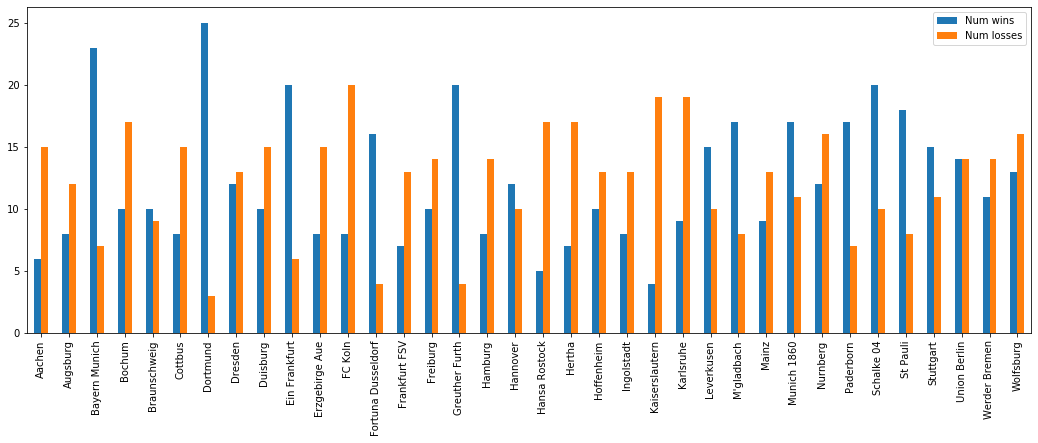

In [46]:
german_teams_df.plot.bar(y = ['Num wins','Num losses'], figsize = (18,6))

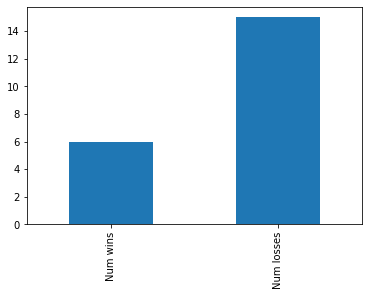

In [45]:
german_teams_df.loc['Aachen',['Num wins','Num losses']].plot.bar() 
# can write a function that does this for any team
# and update the document in MongoDB with the image

Now to create a MongoDB

In [47]:
# reset index and convert df to dict
team_recs = german_teams_df.reset_index().rename({'index':'name'}, axis = 1).to_dict(orient = 'records')
team_recs

[{'name': 'Aachen',
  'FTHG': 15,
  'FTAG': 15,
  'Total goals': 30,
  'Matches Played': 34,
  'Num wins': 6,
  'Num losses': 15,
  'Games in rain': 2,
  'Wins in rain': 1,
  'Wins in rain percentage': 50.0},
 {'name': 'Augsburg',
  'FTHG': 20,
  'FTAG': 16,
  'Total goals': 36,
  'Matches Played': 34,
  'Num wins': 8,
  'Num losses': 12,
  'Games in rain': 0,
  'Wins in rain': 0,
  'Wins in rain percentage': nan},
 {'name': 'Bayern Munich',
  'FTHG': 49,
  'FTAG': 28,
  'Total goals': 77,
  'Matches Played': 34,
  'Num wins': 23,
  'Num losses': 7,
  'Games in rain': 3,
  'Wins in rain': 2,
  'Wins in rain percentage': 66.67},
 {'name': 'Bochum',
  'FTHG': 23,
  'FTAG': 18,
  'Total goals': 41,
  'Matches Played': 34,
  'Num wins': 10,
  'Num losses': 17,
  'Games in rain': 2,
  'Wins in rain': 1,
  'Wins in rain percentage': 50.0},
 {'name': 'Braunschweig',
  'FTHG': 21,
  'FTAG': 16,
  'Total goals': 37,
  'Matches Played': 34,
  'Num wins': 10,
  'Num losses': 9,
  'Games in rain':

In [48]:
handle = MongoHandler('football_database')

In [50]:
# empty the collection before adding all the records
handle.empty_coll(coll = 'german_teams')
handle.add_docs(coll = 'german_teams', recs = team_recs)

# Summary

In this lab, we dug deep and used everything we've learned so far about python programming, databases, HTTP requests and API calls to ETL data from a SQL database into a MongoDB instance!